# Statistical Analysis

#### 1.1. ANOVA

**More information**: [https://reneshbedre.github.io/blog/anova.html]

ANOVA or Analysis of Variance is used to compare the means of more than two groups. For two groups, we can use the T-Student test.

- **Main types of ANOVA**: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)
    - *Note: In ANOVA, group, factors, and independent variables are similar terms*
    
- **ANOVA Hypotheses**:
    - Null hypotheses: Groups means are equal (no variation in means of groups)
    - Alternative hypotheses: At least, one group mean is different from other groups

- **ANOVA Assumptions**
    - Residuals (experimental error) are normally distributed (Shapiro Wilks Test)
    - Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)
    - Observations are sampled independently from each other

- **How ANOVA works?**
    - Check sample sizes: equal number of observation in each group
    - Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degree of freedom (df) for a group
    - Calculate Mean Square error (MSE) (SS error/df of residuals)
    - Calculate F-value (MS of group/MSE)

#### 1.1.1. One Way ANOVA

Here, there are four treatments (A, B, C, and D), which are groups for ANOVA analysis. Treatments are independent variable and termed as factor. As there are four types of treatments, treatment factor has four levels.

For this experimental design, there is only factor (treatments) or independent variable to evaluate, and therefore, one-way ANOVA is suitable for analysis.

In [2]:
A = [25,30,28,36,29]
B = [45,55,29,56,40]
C = [30,29,33,37,27]
D = [54,60,51,62,73]

In [14]:
import pandas as pd

dictionary = {"A": A, "B": B, "C": C, "D":D}

d = pd.DataFrame(dictionary)
d

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


We could also melt the data, although is not necessary for this case:

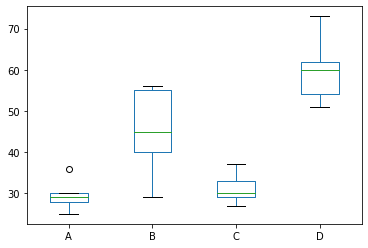

In [15]:
#Generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

In [26]:
# load packages
import scipy.stats as stats

# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


We can get the values in a table like in R

In [48]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

# replace column names
d_melt.columns = ['index', 'treatments', 'value']

d_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [45]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ treatments', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
treatments,3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


**Interpretation**: The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments.

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (Post-hoc comparison) analysis using **Tukey HSD test**.

In [30]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.4 0.0251   1.6929 29.1071   True
     A      C      1.6    0.9 -12.1071 15.3071  False
     A      D     30.4  0.001  16.6929 44.1071   True
     B      C    -13.8 0.0482 -27.5071 -0.0929   True
     B      D     15.0 0.0296   1.2929 28.7071   True
     C      D     28.8  0.001  15.0929 42.5071   True
-----------------------------------------------------


Above results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.

#### 1.1.1.1. Test ANOVA assumptions: Shapiro-Wilk

The **Shapiro-Wilk** test can be used to check the normal distribution of residuals
- **Null hypothesis**: data is drawn from normal distribution.

In [46]:
# load packages
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)

print(w, pvalue)

0.9685019850730896 0.7229772806167603


As the P-value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

#### 1.1.1.2. Test ANOVA Assumptions: Bartlett's test of Homogenity

As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances. 
- **Null hypothesis**: samples from populations have equal variances.

In [37]:
# load packages
import scipy.stats as stats

w, pvalue = stats.bartlett(d['A'], d['B'], d['C'], d['D'])
print(w, pvalue)

5.687843565012841 0.1278253399753447


As the P-value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

#### 1.1.1.3 Test ANOVA Assumptions: Levene's test of Homogeneity
Can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.

### 1.1.2. Two way factor ANOVA

From dataset, there are two factors (independent variables) viz. genotypes and yield in years. Genotypes and years has five and three levels respectively (see one-way ANOVA to know factors and levels).

For this experimental design, there are two factors to evaluate, and therefore, two-way ANOVA is suitable for analysis. Here, using two-way ANOVA, we can simultaneously evaluate how type of genotype and years affects the yields of plants. If you apply one-way ANOVA here, you can able to evaluate only one factor at a time.

From two-way ANOVA, we can tests three hypotheses 1) effect of genotype on yield 2) effect of time (years) on yield, and 3) effect of genotype and time (years) interactions on yield

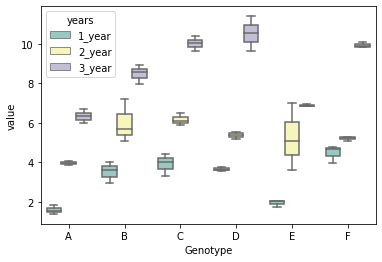

In [57]:
# load packages
import pandas as pd
import seaborn as sns

# load data file
Genotype = ['A','A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'F']
One_year = [1.53, 1.83, 1.38, 3.6, 2.94, 4.02, 3.99, 3.3, 4.41, 3.75, 3.63, 3.57, 1.71, 2.01, 2.04, 3.96, 4.77, 4.65]
Two_year = [4.08, 3.84, 3.96, 5.7, 5.07, 7.2, 6.09, 5.88, 6.51, 5.19, 5.37, 5.55, 3.6, 5.1, 6.99, 5.25, 5.28, 5.07]
Three_year = [6.69, 5.97, 6.33, 8.55, 7.95, 8.94, 10.02, 9.63, 10.38, 11.4, 9.66, 10.53, 6.87, 6.93, 6.84, 9.84, 9.87, 10.08]

dictionary = {"Genotype":Genotype, "1_year":One_year, "2_year":Two_year,"3_year":Three_year}

d = pd.DataFrame(dictionary)

# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])

# replace column names
d_melt.columns = ['Genotype', 'years', 'value']

# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [58]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ Genotype + years + Genotype:years', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Genotype,58.551733,5.0,32.748581,1.931655e-12
years,278.925633,2.0,390.014868,4.006243e-25
Genotype:years,17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


**Interpretation**: The P-value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (P<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.

Now, we know that genotype and time (years) differences are statistically significant, but ANOVA does not tell which genotype and time (years) are significantly different from each other. To know the pairs of significant different genotype and time (years), perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

Similar to one-way ANOVA, you can use Levene and Shapiro-Wilk test to validate the assumptions for homogeneity of variances and normal distribution of residuals.

#### 1.2. Chi-Square

More information on: https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95

ANOVA is not valid to compare binomial variables, such as sold/not sold, treated/not treated, etc. In those cases, we use **Chi-Square**. 

- Chi-square test is a non-parametric (distribution-free) method used to compare the relationship between the two categorical (nominal) variables in a contingency table. For example, we have different treatments (treated and nontreated) and treatment outcomes (cured and noncured), here we could use the chi-square test for independence to check whether treatments are related to treatment outcomes.

*Note: Chi-square test for independence is different than the chi-square goodness-of-fit test*

- **Hypotheses**:
    - **Null hypotheses**: The two categorical variables are independent (no association between the two variables)
    - **Alternative hypotheses**: The two categorical variables are dependent (there is an association between the two variables)
    - *Note: There are no one or two-tailed P-value. Rejection region of the chi-square test is always on the right side of the distribution*.
    
- **Assumptions**:
    - The two variables are categorical (nominal) and data is randomly sampled
    - The levels of variables are mutually exclusive
    - The expected frequency count for at least 80% of the cell in a contingency table is at least 5
    - The expected frequency count should not be less than 1
    - Observations should be independent of each other
    - Observation data should be frequency counts and not percentages or transformed data


#### 1.2.1. How chi-square works?

In [77]:
# We need to import the following libraries
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

#Importing a dataframe
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/chisq/drugdata.csv", index_col=0)
df

,cured,noncured
treatments,,
treated,60,10
nontreated,30,25


In [78]:
#SciPy’s chi2_contingency() returns four values, chi-square value, p-value, degree of freedom and expected values.
chi2_contingency(df)

(13.3364898989899, 0.0002602911116400899, 1, array([[50.4, 19.6],
        [39.6, 15.4]]))

**Interpretation**: The P-value obtained from chi-square test for independence is significant (P<0.05) (0.0260291), and therefore, we conclude that there is a significant association between treatments (treated and nontreated) with treatment outcome (cured and noncured)

Let's see another example with Chi-Square, now with t-shirts

In [81]:
tshirts = pd.DataFrame([[48,22,33,47],[35,36,42,27]],
    index=["Male","Female"],
    columns=["Balck","White","Red","Blue"])
tshirts

,Balck,White,Red,Blue
Male,48,22,33,47
Female,35,36,42,27


In [86]:
chi2_contingency(tshirts)

(11.56978992417547,
 0.00901202511379703,
 3,
 array([[42.93103448, 30.        , 38.79310345, 38.27586207],
        [40.06896552, 28.        , 36.20689655, 35.72413793]]))

#### 1.2.2. Chi Square: Expected values

You can find the expected values at the forth in the returned value. It is in an array form. Let’s print the expected values in a friendly way. We again use the Pandas dataframe. We are going to add index and column values and round the values to the two decimal places round(2).

The output below is a contengency table. We can calculate the value using the following formula:

<img src="https://miro.medium.com/max/1400/1*-cmU46KrZ9afSgwQWQNU_w.png" width="500" height="500" />

In [83]:
df=chi2_contingency(tshirts)[3]
pd.DataFrame(
    data=df[:,:], 
    index=["Male","Female"],
    columns=["Black","White","Red","Blue"]
).round(2)

,Black,White,Red,Blue
Male,42.93,30.0,38.79,38.28
Female,40.07,28.0,36.21,35.72


#### 1.2.3. Chi Square result

You can find the 𝜒2 value in the first returned value from chi2_contingency. 

The 𝜒2 equation tells us to find the square of the difference between the actual value and expected value and divide it by the expected value. Then add all together to find the 𝜒2 value.

But how do you find the 𝜒2 manually? The formula for the Chi-square is:

<img src="https://miro.medium.com/max/1400/1*ITUN-8jkW56j9QczVXR_Kg.png" width="500" height="500" />

In [88]:
chi2_contingency(tshirts)[0]

11.56978992417547

#### 1.2.4. Chi square p-value

You can find the p-value at the second in the returned value. p-value measures the probability of seeing the effect when the null hypothesis is true. So, when the p-value is low enough, we reject the null hypothesis and conclude the observed effect holds. We will talk about the null hypothesis later in this article.

In [89]:
chi2_contingency(tshirts)[1]

0.00901202511379703

#### 1.2.5. Chi Square: Degree of Freedom (DoF)

You can find the degree of freedom in the third returned value. We are going to use this to find the critical value later. The way you find the degree of freedom (dof) for 𝜒2 for independence is different from 𝜒2 Goodness of fit.
For 𝜒2 for independence:

<img src="https://miro.medium.com/max/1400/1*1dHq2HdLx9HOqNEWbCy7dg.png" width="500" height="500" />

For example, if your data has 4 rows x 3 columns, then the degree of freedom is:

<img src="https://miro.medium.com/max/984/1*rdlMaYqKKAzg9R2dHJlkhw.png" width="300" height="300" />

In the returned value from the chi2_contingency, the third one is the degree of freedom. We use [2] which is the third one. The following will output 3.

In [90]:
chi2_contingency(tshirts)[2]

3

#### 1.2.6. Critical values

The level of significance and degree of freedom can be used to find the critical value. As I mentioned before you can find the degree of freedom from the array. In order to find critical values, you need to import chi2 from scipy.state and define probability from the level of significance, 1%, 5% 10%, etc.

In [93]:
from scipy.stats import chi2

significance = 0.01
p = 1 - significance
dof = chi2_contingency(tshirts)[2]
critical_value = chi2.ppf(p, dof)
critical_value

11.344866730144373

When the degree of freedom is 3 and at the 1% level of significance the critical value is about 11.34. You can confirm with this value using cdf. The following will output 0.99.

In [94]:
p = chi2.cdf(critical_value, dof)
p

0.99

## Cramer's V

In [ ]:
import scipy.stats as ss

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(clean_avails["FORTA"], clean_avails["Western"]).as_matrix()
cramers_v(confusion_matrix)

## Heterokesdaticity Tests

In the folowing [link](https://www.statsmodels.org/stable/diagnostic.html?highlight=heteroscedasticity) we can find a bunch of heterokedasticity tests.

In [2]:
import pandas as pd
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

In [3]:
import statsmodels.formula.api as smf

#fit regression model
fit = smf.ols('rating ~ points+assists+rebounds', data=df).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3.299
Date:                Thu, 24 Sep 2020   Prob (F-statistic):             0.0995
Time:                        12:26:17   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4716     14.588      4.282      0.0

C:\Users\Jota_Moreno\Anaconda3\envs\tfm\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## Breusch Pagan Test for Heterkodeasticity
A Breusch-Pagan test uses the following null and alternative hypotheses:

- The null hypothesis (H0): Homoscedasticity is present.
- The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

In [6]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sm

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sm.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 6.003951995818433),
 ('p-value', 0.11141811013399583),
 ('f-value', 3.004944880309618),
 ('f p-value', 0.11663863538255281)]

[('Lagrange multiplier statistic', 6.003951995818433),
 ('p-value', 0.11141811013399583),
 ('f-value', 3.004944880309618),
 ('f p-value', 0.11663863538255281)]


In this example, the Lagrange multiplier statistic for the test is 6.004 and the corresponding p-value is 0.1114. Because this p-value is not less than 0.05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

## White Heterokedasticity test

In [9]:
from statsmodels.stats.diagnostic import het_white

white_test = het_white(fit.resid, exog = fit.model.exog)

In [10]:
white_test

(10.0, 0.3504852123233613, nan, nan)

## How to fix Heteroscedasticity

In the previous example we saw that heteroscedasticity was not present in the regression model. However, when heteroscedasticity actually is present there are three common ways to remedy the situation:

1. Transform the dependent variable. One way to fix heteroscedasticity is to transform the dependent variable in some way. One common transformation is to simply take the log of the dependent variable.

2. Redefine the dependent variable. Another way to fix heteroscedasticity is to redefine the dependent variable. One common way to do so is to use a rate for the dependent variable, rather than the raw value.

3. Use weighted regression. Another way to fix heteroscedasticity is to use weighted regression. This type of regression assigns a weight to each data point based on the variance of its fitted value. When the proper weights are used, this can eliminate the problem of heteroscedasticity.